# Overall
```
- 프로젝트명 : 카드거래이력 분석을 통한 시장 동향 파악
- 프로젝트유형 : 데이터 EDA 및 인사이트 추출

- 시나리오 :
    - A사는 신규 브랜드의 점포를 입점 시키려는 계획을 가지고 있다.
    - 신규 브랜드이기 때문에 과거 상권에 대한 정보가 없어, 어느 지역에 입점을 시켜야할지 고민이 많다.
    - 고민 끝에 후보 지역A를 최종 후보로 정했다.
    - 하지만 자신들의 브랜드와 해당 지역에 거주하는 고객의 소비성향과 비슷한지가 아직 의문이다.
    - 따라서 신용카드 Spending data를 활용하여 고객의 소비 성향을 파악하고자 한다.
    - 파악된 고객의 소비성향과 브랜드의 성향이 맞는지 비교해보고 최종 결정을 내리고자 한다.

- 문제정의 : 신규 브랜드 입점 상권 불분명

- 기대효과 : 신규 상권 입점 여부 결정 및 상권의 고객 소비성향 파악

- 해결방안 :
    - 카드 Spending data 활용 지역 거주 고객 소비성향 파악 및 브랜드와 매칭을 통해 입점 결정

- 성과측정 : 신규 진입 결정 여부

- 운영방향 :
    - 인사이트 Report 작성 및 보고

- 분석결과
    - 점포별 이용 횟수, 매출 규모, 이용 고객 수 기준, 전체 대비 비중 지표를 산출
        - #cnt_ratio(a) # 전체 상점 중 이용 비중 0.3
        - #amt_ratio(b) # 전체 매출액 중 비중 0.35
        - #customer_ratio(c) # 전체 고객 사용량 비중 0.35

    - 상기 3개 기준에 가중치 부여를 통해 core_store 점수 산출 후 상위 5개 핵심 업종 정의
        - store_id = 753, 0, 1342, 221, 428

    - 핵심 업종 대상의 사업 전략 인사이트
        - 평일/주말 거래량 비교 : 주말이 전체 거래량의 약 70% 차지
        - 공휴일 유무 비교 : 공휴일이 전체 거래량의 5% 차지
        - 일시불 / 할부 비교 : 일시불이 전체 거래량의 99.6% 수준 차지
            - 거래액 기준 일시불이 전체 거래액의 약 99% 차지
        - 취소 매출 분석
            - 전체 매출액의 0.8% 차지, 핵심업종 별 취소 매출액은 0.39 ~ 1.71% 사이 차지
        - 핵심 업종의 연도별 매출 비중 변화 :
            - 0, 1342 업종의 매출 비중의 70% 가량 차지

- 제안
    - 평일 대비 주말의 확대 운영 제안, 주말에 전체 거래량의 70%가 발생
    - 공휴일에 큰 영향을 받지 않는 상권 특성을 감안, 공휴일 집중 프로모션 등의 집중 운영은 우선순위 고려대상으로 권장드리지 않습니다.
    - 상위 업종 5곳 중 시장 점유율이 높은 0, 1342 업종을 대상으로 추가 분석을 통해 밴치마크 포인트를 파악 및 고민해볼 수 있겠습니다.

- Meta data
    - store_id : 상점 ID  
    - date : 거래 날짜  
    - time : 거래 시간  
    - card_id : 카드 사용자 식별 ID  
    - amount : 결제 금액 (음수는 거래 취소)  
    - installments : 할부 개월 (일시불은 빈문자열)  
    - days_of_week : 요일 (0 = 월요일, 6 = 일요일)  
    - holyday : 공휴일 여부  

```

<!--
https://colab.research.google.com/drive/1CsKDUOEY9oaenlR_LCiYifC_w0EC1LMT
https://colab.research.google.com/drive/1Oxl8h-7sKFx0OFLbvlR97DWse2h7RK9t
 -->


In [1]:
#Warnings 제거
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Data read
import pandas as pd
df = pd.read_csv('S_PJT04_DATA.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


## **🔈Process01**  

In [3]:
#Data 형태 확인
#3,362,796  row, 8 col로 구성됨
print('df', df.shape)

df (3362796, 8)


In [6]:
#a type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [7]:
#Null 값 확인
print(df.isnull().sum())

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [8]:
#Outlier 확인, 음수값 확인
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [9]:
#할부개월 col에서 일시불은 빈문자열이기 때문에 0으로 변환 처리
df['installments'].fillna(0,inplace=True)

In [10]:
#Null 값 확인
print(df.isnull().sum())

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


### · 업종별 이용 및 매출 비중 분석
---  

In [11]:
#총 1,775개의 Unique한 상점이 존재
df['store_id'].value_counts()

,count
store_id,
0,68773
753,39318
105,36063
1342,33335
428,33285
...,...
1530,1
991,1
657,1


In [12]:
#업종별 이용 횟수 비중
df_store = pd.DataFrame(df['store_id'].value_counts()).reset_index()
df_store.columns = ['store_id', 'cnt']
df_store.head(5)

,store_id,cnt
0,0,68773
1,753,39318
2,105,36063
3,1342,33335
4,428,33285


In [13]:
#업종별 이용 횟수 비중 Top 10
df_store['total'] = df_store['cnt'].sum()
df_store['ratio'] = round( (df_store['cnt'] / df_store['total']) * 100,2)
df_store.head(10)

,store_id,cnt,total,ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99
5,221,31409,3362796,0.93
6,161,27170,3362796,0.81
7,1038,25694,3362796,0.76
8,323,25221,3362796,0.75
9,1366,24946,3362796,0.74


In [46]:
#업종별 매출액 비중 (※ groupby.sum() 활용)
df_amt = pd.DataFrame(df['amount'].groupby(df['store_id']).sum()).reset_index().sort_values(by=['amount'], ascending=False)

#업종별 매출액 비중 Top 10
df_amt['total'] = df_amt['amount'].sum()
df_amt['ratio'] = round( (df_amt['amount'] / df_amt['total']) * 100,2)
df_amt.head(10)

## 매출액 비중이 높은 store 10곳을 대상으로 후보지역 a의 소비성향을 집중 파악해보겠습니다.

,store_id,amount,total,ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01
1065,1076,4860885,490841453,0.99
801,810,3677501,490841453,0.75
1013,1024,3330293,490841453,0.68
480,486,3235482,490841453,0.66
590,597,2999180,490841453,0.61


## **🔉Process02**  
**┗ 핵심 업종 탐색**  
---

### · 업종별 이용 고객수 분석
---

In [15]:
#상위에서 정의한 이용 비중 Data
df_store.columns = ['store_id', 'cnt', 'cnt_total', 'cnt_ratio']
df_store.head(5)

,store_id,cnt,cnt_total,cnt_ratio
0,0,68773,3362796,2.05
1,753,39318,3362796,1.17
2,105,36063,3362796,1.07
3,1342,33335,3362796,0.99
4,428,33285,3362796,0.99


In [16]:
#상위에서 정의한 매출 비중 Data
df_amt.columns = ['store_id', 'amt', 'amt_total', 'amt_ratio']
df_amt.head(5)

,store_id,amt,amt_total,amt_ratio
746,753,9474601,490841453,1.93
1326,1342,7301327,490841453,1.49
158,161,5236075,490841453,1.07
0,0,5234611,490841453,1.07
948,958,4965728,490841453,1.01


In [17]:
#Data merge
# 1번 째 merge
df_merge = pd.merge(df_store, df_amt , how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07
1,753,39318,3362796,1.17,9474601,490841453,1.93
2,105,36063,3362796,1.07,2991082,490841453,0.61
3,1342,33335,3362796,0.99,7301327,490841453,1.49
4,428,33285,3362796,0.99,1312204,490841453,0.27


In [18]:
#이용 고객수(Unique)
df_customer = pd.DataFrame(df['card_id'].groupby(df['store_id']).nunique()).reset_index() # store id 기준으로 card id unique 값 count
df_customer.columns = ['store_id', 'customer']
df_customer['customer_total'] = df['card_id'].nunique() # card id 전체 count
df_customer['customer_ratio'] = round((df_customer['customer'] / df_customer['customer_total'])*100,2)

#이용 고객수(Unique) 기준 내림차순 정렬
df_customer.sort_values(by=['customer_ratio'], ascending = False).head(10)

,store_id,customer,customer_total,customer_ratio
423,428,18456,922522,2.00
218,221,17161,922522,1.86
289,293,14915,922522,1.62
1326,1342,14789,922522,1.60
932,942,13760,922522,1.49
1196,1209,13512,922522,1.46
0,0,12727,922522,1.38
1027,1038,12523,922522,1.36
746,753,11960,922522,1.30
123,126,11070,922522,1.20


In [19]:
#이용 고객수 Left join
# 2번 째 merge
df_merge = pd.merge(df_merge, df_customer, how='left', on='store_id')
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00


### · 1회 사용 금액 / 객단가 분석
---

In [20]:
#1회 사용금액
df_merge['amt_per_use'] = round(df_merge['amt'] / df_merge['cnt'],0)

#객단가
df_merge['cus_per_use'] = round(df_merge['amt'] / df_merge['customer'],0)

df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0


### · 핵심업종 정의
---

In [21]:
#이용 비중, 이용 금액 비중, 이용 고객수 비중에 가중치를 적용하여 새로운 Score를 정의
# 가중치는 무슨 기준으로 정의하신건가요 -> 여기서는 도메인 지식을 기반으로 책정하는 방향을 검토해볼 수 있겠습니다.

#cnt_ratio(a) # 전체 상점 중 이용 비중
#amt_ratio(b) # 전체 매출액 중 비중
#customer_ratio(c) # 전체 고객 사용량 비중

# 가중치 설정
a = 0.3
b = 0.35
c = 0.35

df_merge['core_store'] = df_merge['cnt_ratio']*a + df_merge['amt_ratio']*b + df_merge['customer_ratio']*c
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915


In [22]:
#Min-max 표준화를 통해 100점 만점의 점수로 변환
df_merge['core_store_scaled'] = df_merge['core_store'].apply(lambda x: (x - df_merge['core_store'].min())  / (df_merge['core_store'].max() - df_merge['core_store'].min()) )
df_merge['core_store_scaled'] = round(df_merge['core_store_scaled'] * 100,0)
df_merge.head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
2,105,36063,3362796,1.07,2991082,490841453,0.61,8207,922522,0.89,83.0,364.0,0.8460,57.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


In [23]:
#store id = 753, 0, 1342, 221, 428 / 총 5개의 store을 핵심업종으로 정의
df_merge.sort_values(by=['core_store_scaled'], ascending=False).head(5)

,store_id,cnt,cnt_total,cnt_ratio,amt,amt_total,amt_ratio,customer,customer_total,customer_ratio,amt_per_use,cus_per_use,core_store,core_store_scaled
1,753,39318,3362796,1.17,9474601,490841453,1.93,11960,922522,1.30,241.0,792.0,1.4815,100.0
0,0,68773,3362796,2.05,5234611,490841453,1.07,12727,922522,1.38,76.0,411.0,1.4725,99.0
3,1342,33335,3362796,0.99,7301327,490841453,1.49,14789,922522,1.60,219.0,494.0,1.3785,93.0
5,221,31409,3362796,0.93,2513245,490841453,0.51,17161,922522,1.86,80.0,146.0,1.1085,75.0
4,428,33285,3362796,0.99,1312204,490841453,0.27,18456,922522,2.00,39.0,71.0,1.0915,74.0


## **🔊Process03**  
**┗ 핵심업종 추가 분석**  
---

### · 핵심업종 주말/주중/공휴일 분석
---

In [24]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0


In [25]:
#상위에서 정의한 핵심업종 Data만 가져오기
df_core_store = df[df['store_id'].isin([753, 0, 1342, 221, 428])]
df_core_store['store_id'].value_counts()

,count
store_id,
0,68773
753,39318
1342,33335
428,33285
221,31409


In [47]:
# 각 요일별 데이터 확인
#  days_of_week : 요일 (0 = 월요일, 6 = 일요일)
df_core_store['days_of_week'].value_counts().sort_index(ascending=True)

,count
days_of_week,
0,28153
1,28159
2,28635
3,28269
4,29282
5,32850
6,30772


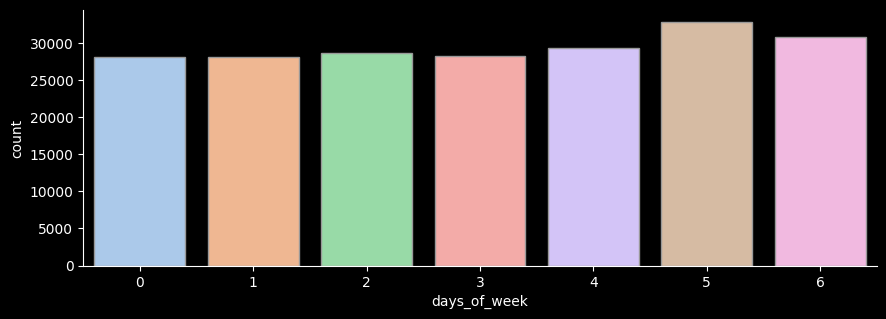

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

#0-월요일, ... , 5-토요일, 6-일요일
#토요일 1위, 일요일 2위 ..
# 토요일(5), 일요일(6) 이 가장 높은 것으로 나타났습니다.
# 해당 지역의 고객 집중 요일은 토, 일 로 특정, 운영 일정은 토, 일에 집중하는 것을 권장
sns.catplot(x="days_of_week", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

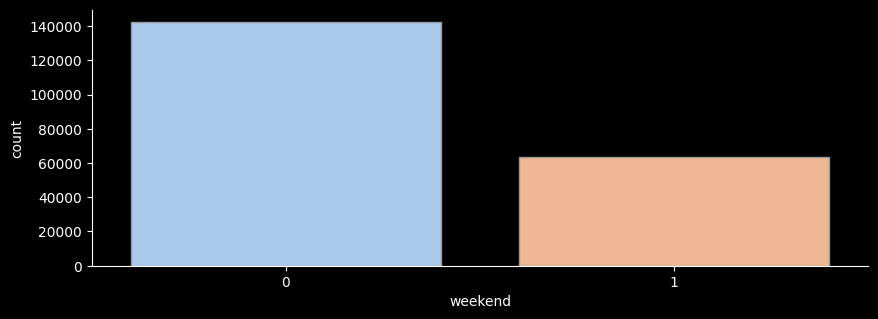

In [29]:
#주말(1), 주중(0) Plotting
sns.catplot(x="weekend", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [28]:
#주말(1), 주중(0) 소비형태 비교
# 주말
import numpy as np
df_core_store['weekend'] = np.where(df_core_store['days_of_week'].isin([5,6]), 1, 0)

# 주말 (토, 일) 비중이 약 70% 를 차지하고 있는 것으로 나타났습니다.
pd.merge(df_core_store['weekend'].value_counts().reset_index(), df_core_store['weekend'].value_counts(normalize = True).reset_index(), how='left', on='weekend')

,weekend,count,proportion
0,0,142498,0.691335
1,1,63622,0.308665


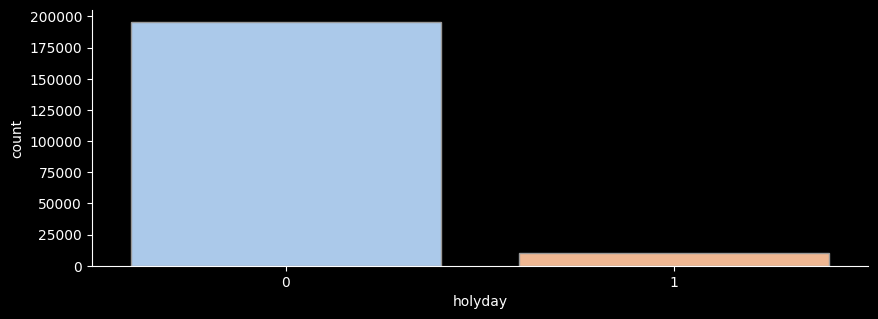

In [30]:
#holyday(공휴일) 여부에 따른 핵심업종 소비 횟수 비교
sns.catplot(x="holyday", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [84]:
#  - holyday : 공휴일 여부
df_core_store['holyday'].value_counts(normalize= True).sort_index(ascending=True)

,proportion
holyday,
0,0.949306
1,0.050694


### · 핵심업종 일시불 및 할부결제 분석
---

In [31]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


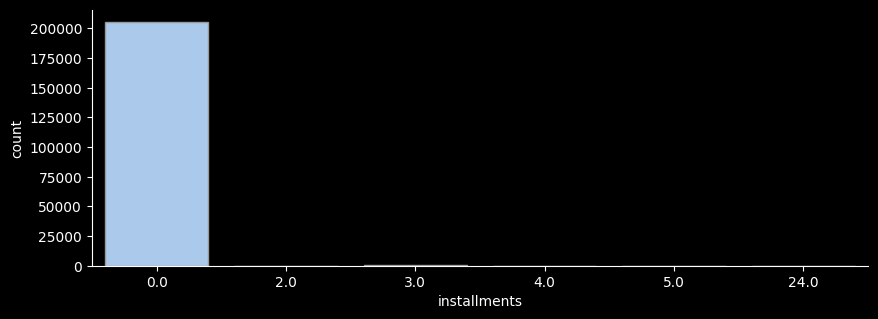

In [32]:
#0-일시불 그외는 N 개월 할부
sns.catplot(x="installments", kind="count",palette="pastel", edgecolor=".6",data=df_core_store);
plt.gcf().set_size_inches(10, 3)

In [57]:
#발생 거래의 99%가 일시불로 진행되는 점을 알 수 있었습니다.
# 할부 거래 비중이 매우 적을 것으로 예상
df_core_store['installments'].value_counts(normalize = True) * 100

,proportion
installments,
0.0,99.676887
3.0,0.231419
2.0,0.083447
5.0,0.005822
24.0,0.001455
4.0,0.000970


In [85]:
# 할부 개월 수 별 거래액 파악
# 앞서 발생 거래 수 비중과 유사한 양상

tmp = df_core_store.groupby(['installments'])['amount'].sum().reset_index()
# tmp['total'] = tmp['amount'].sum()
tmp['total'] = tmp['amount'].sum()
tmp['amt_proportion'] = round( (tmp['amount'] / tmp['total']) * 100,2)
tmp.sort_values(by=['amt_proportion'], ascending=False)

,installments,amount,total,amt_proportion
0,0.0,25507055,25835988,98.73
2,3.0,204183,25835988,0.79
1,2.0,68883,25835988,0.27
5,24.0,49950,25835988,0.19
4,5.0,4893,25835988,0.02
3,4.0,1024,25835988,0.00


### · 핵심업종 취소금액 분석
---

In [34]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [60]:
# 취소 매출 비중은 전체 매출액의 0.8% 수준임을 확인하였습니다.
# 해당 지역의 예상 취소 매출 비중은 0.8% 로 예상
print(round(abs(df_core_store[df_core_store['amount'] < 0]['amount'].sum()) / df_core_store['amount'].sum() * 100, 2), "%")

0.81 %


In [65]:
#753, 0, 1342, 221, 428
#'Store 0'이 가장 많은 취소 금액 비중
df1 = df_core_store[df_core_store['store_id']==753]
df2 = df_core_store[df_core_store['store_id']==0]
df3 = df_core_store[df_core_store['store_id']==1342]
df4 = df_core_store[df_core_store['store_id']==221]
df5 = df_core_store[df_core_store['store_id']==428]

print("store(753) :", round(abs(df1[df1['amount'] < 0]['amount'].sum()) / df1['amount'].sum() * 100, 2), "%")
print("store(0) :", round(abs(df2[df2['amount'] < 0]['amount'].sum()) / df2['amount'].sum() * 100, 2), "%")
print("store(1342) :", round(abs(df3[df3['amount'] < 0]['amount'].sum()) / df3['amount'].sum() * 100, 2), "%")
print("store(221) :", round(abs(df4[df4['amount'] < 0]['amount'].sum()) / df4['amount'].sum() * 100, 2), "%")
print("store(428) :", round(abs(df5[df5['amount'] < 0]['amount'].sum()) / df5['amount'].sum() * 100, 2), "%")

store(753) : 0.39 %
store(0) : 1.4 %
store(1342) : 0.58 %
store(221) : 1.71 %
store(428) : 1.13 %


### · 핵심업종 년도별 매출 비중 변화 분석
---

In [37]:
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0


In [66]:
#Time data 처리
import datetime
df_core_store['Date_merge'] = df['date'].astype(str) + ' ' + df['time'].astype(str)
df_core_store['Date_merge'] = pd.to_datetime(df_core_store['Date_merge'])
df_core_store.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016-12-19 13:31:08,2016,12


In [67]:
#2016년 8월 1일 ~ 2018년 7월 31일까지의 Data
df_core_store['Date_merge'].min(), df_core_store['Date_merge'].max()

(Timestamp('2016-08-01 00:14:51'), Timestamp('2018-07-31 23:56:14'))

In [68]:
#년, 월로 시간데이터 분해
df_core_store['year'] = df_core_store['Date_merge'].dt.year
df_core_store['month'] = df_core_store['Date_merge'].dt.month
df_core_store.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,weekend,Date_merge,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,0,2016-12-14 18:05:31,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,0,2016-12-14 18:05:54,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,0,2016-12-19 12:42:31,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,0,2016-12-19 12:48:08,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,0,2016-12-19 13:31:08,2016,12


In [69]:
#핵심업종별 매출 금액 by 년도
df_year = pd.DataFrame(df_core_store.groupby(['store_id', 'year'])['amount'].sum()).reset_index()
df_year.head(6)

,store_id,year,amount
0,0,2016,137336
1,0,2017,3235476
2,0,2018,1861799
3,221,2016,528397
4,221,2017,1318231
5,221,2018,666617


In [79]:
df_pivot = pd.pivot_table(df_year,             # 피벗할 데이터프레임
                      index = 'year',          # 행 위치에 들어갈 열
                      columns = 'store_id',    # 열 위치에 들어갈 열
                      values = 'amount')       # 데이터로 사용할 열
#1단계
df_pivot = df_pivot.reset_index()      # 인덱스였던 'year'를 일반 열로 변경
df_pivot.columns.names = ['']          # 다중컬럼 계층(index name)을 제거 (깔끔한 출력용)

#2단계
df_pivot = df_pivot.set_index('year')  # 'year'을 다시 인덱스로 지정

#3단계
df_pivot = df_pivot.fillna(0) # 결측치 처리

#4단계
df_pivot['total'] = df_pivot.iloc[:,0] + df_pivot.iloc[:,1] + df_pivot.iloc[:,2] + df_pivot.iloc[:,3] + df_pivot.iloc[:,4]

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,137336.0,528397.0,305336.0,525324.0,0.0,1496393.0
2017,3235476.0,1318231.0,665009.0,8129699.0,5113535.0,18461950.0
2018,1861799.0,666617.0,341859.0,819578.0,2187792.0,5877645.0


In [80]:
#total 금액으로 나눠서 매출 비중으로 변환
df_pivot.iloc[:,0] = (df_pivot.iloc[:,0] / df_pivot['total'])
df_pivot.iloc[:,1] = (df_pivot.iloc[:,1] / df_pivot['total'])
df_pivot.iloc[:,2] = (df_pivot.iloc[:,2] / df_pivot['total'])
df_pivot.iloc[:,3] = (df_pivot.iloc[:,3] / df_pivot['total'])
df_pivot.iloc[:,4] = (df_pivot.iloc[:,4] / df_pivot['total'])

df_pivot

,0,221,428,753,1342,total
year,,,,,,
2016,0.091778,0.353114,0.204048,0.351060,0.000000,1496393.0
2017,0.175251,0.071403,0.036021,0.440349,0.276977,18461950.0
2018,0.316759,0.113416,0.058163,0.139440,0.372223,5877645.0


In [81]:
# total column drop
df_pivot = df_pivot.drop(['total'], axis=1)
df_pivot.apply(lambda x: round(x*100,2))

,0,221,428,753,1342
year,,,,,
2016,9.18,35.31,20.40,35.11,0.00
2017,17.53,7.14,3.60,44.03,27.70
2018,31.68,11.34,5.82,13.94,37.22


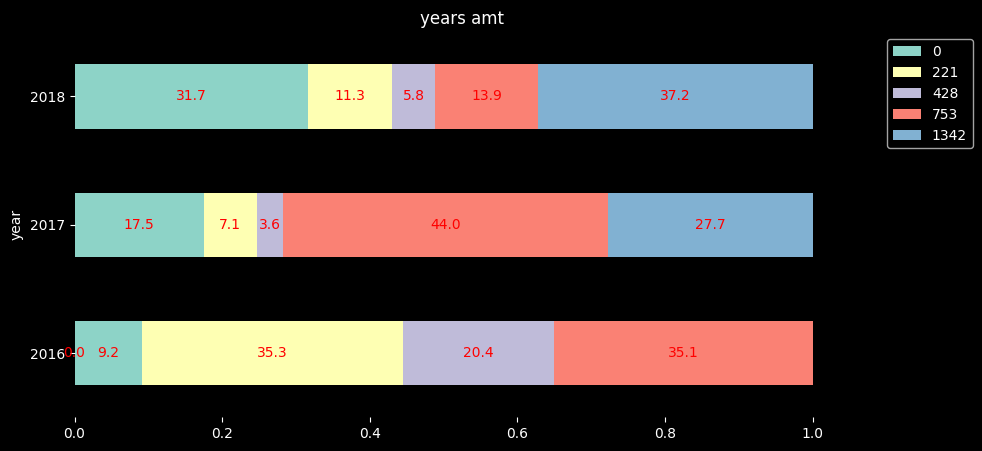

In [82]:
# 후보지역 a의 주요 수요 브랜드로는 0, 1342 브랜드로 나타났으며, 당사 브랜드와 해당 브랜드의 성향이 유사한지 등에 대한 추가 파악이 필요합니다.

import warnings
warnings.filterwarnings('ignore')
plt.style.use(['dark_background'])

ax = df_pivot.plot(kind='barh', stacked=True, title="years amt", rot=0);
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='r');

plt.box(False)
plt.gcf().set_size_inches(10, 5)
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()